In [56]:
from load_modules import *

plt.rcParams['figure.figsize'] = (14.0, 4.0)
plt.rcParams['figure.dpi'] = 250
plt.rcParams['lines.linewidth'] = 1

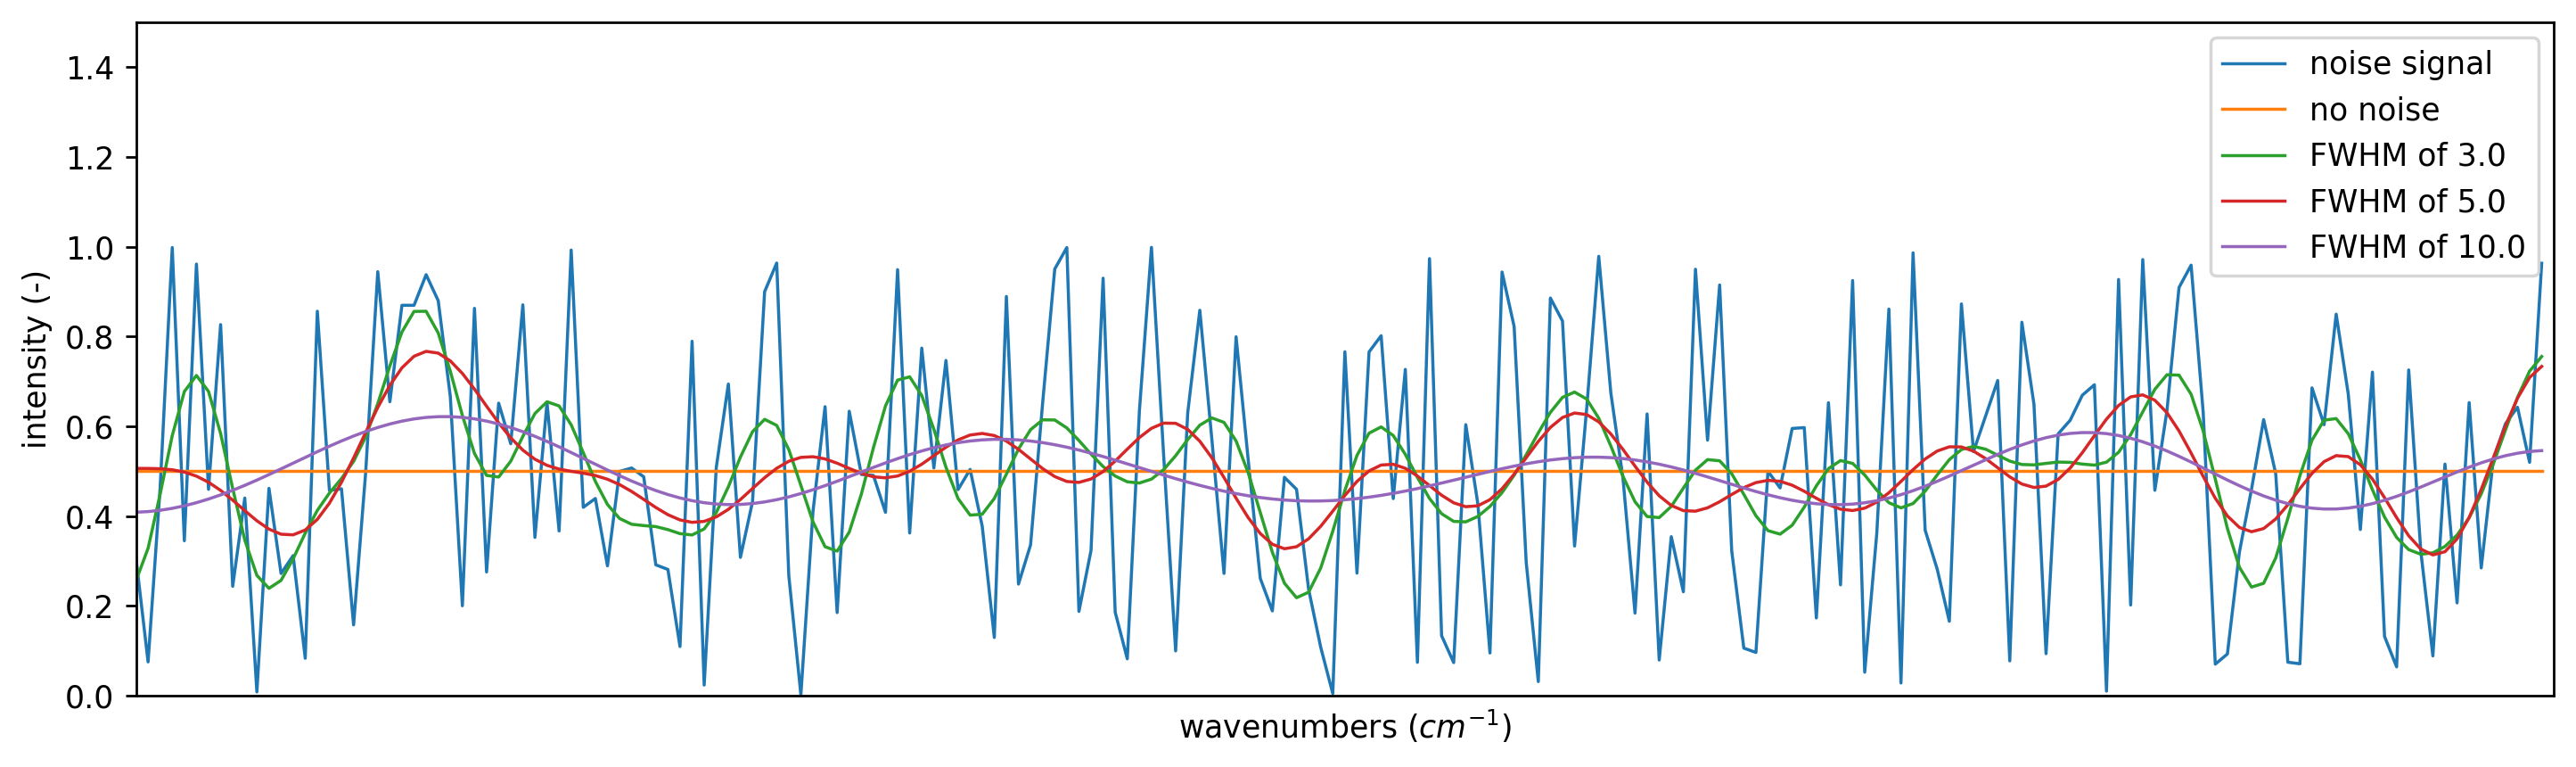

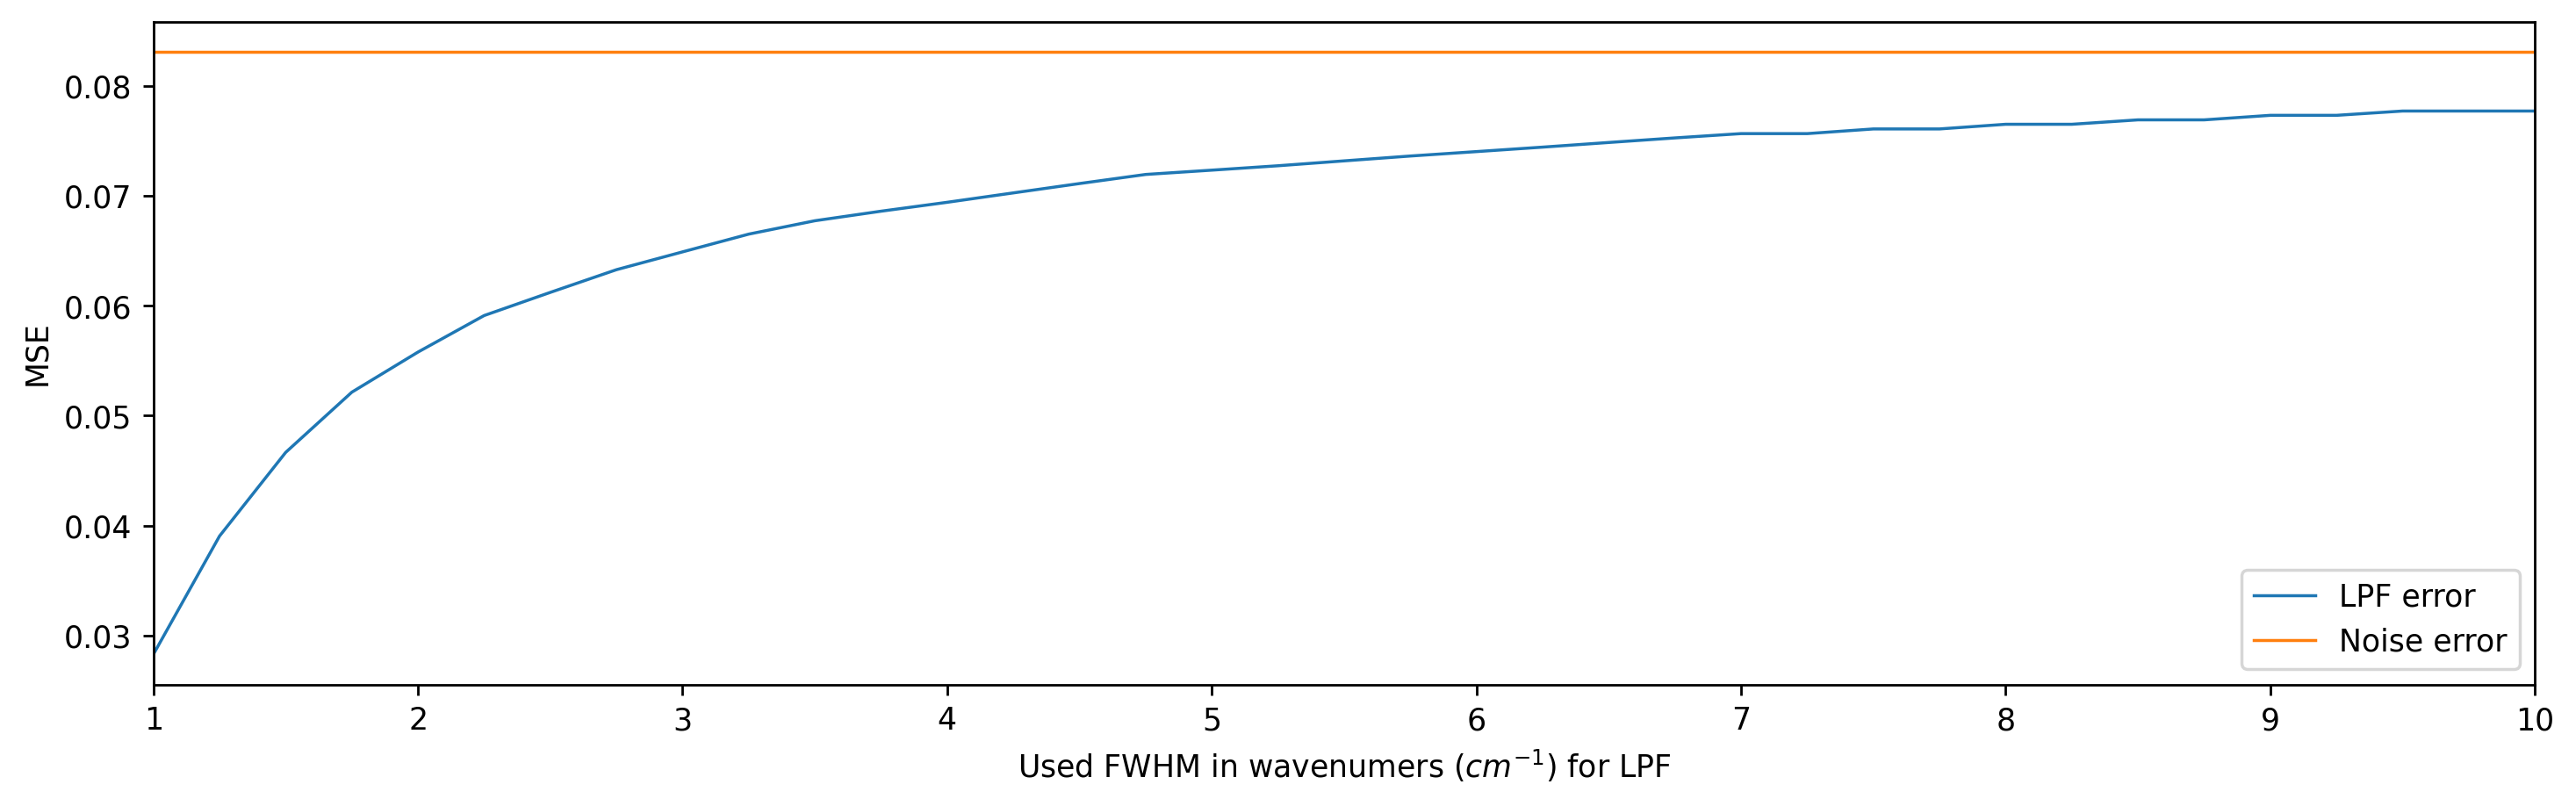

In [61]:
# from sklearn.linear_model import LinearRegression

# model = LinearRegression()

n = 200
x = np.arange(n)
max_LPF = 10

error_lst = []
error_lst2 = []
FWHM_smoothing_lst = np.arange(1,max_LPF+.1,0.25)
for i in range(1000):
    signal = np.random.random(n)
    
    tmp_error = []
    tmp_error2 = []
    for FWHM_smoothing in FWHM_smoothing_lst:
        k = int(2*(x[-1] - x[0]) / (3*FWHM_smoothing))

        cosine = dct(signal, type=2, norm='backward')
        cosine[k:] = 0
        smooth = dct(cosine, type=3, norm="forward")
        diff = signal - smooth
#         model.fit(x.reshape(-1, 1), signal)
#         y = model.predict(x.reshape(-1, 1))

        if i == 0 and FWHM_smoothing in [3,5,10]:
            if FWHM_smoothing == 3:
                plt.plot(x+100, signal, label="noise signal")
                plt.plot(x+100, np.ones(n)*0.5, label="no noise")
            plt.plot(x+100, smooth, label=f"FWHM of {FWHM_smoothing}")

        tmp_error.append(error.MSE(signal,smooth))
        tmp_error2.append(error.MSE(signal,0.5))
        
    if i == 0:
        plt.xlim(100,100+n)
        plt.legend()
        plt.xlabel(r"wavenumbers ($cm^{-1}$)")
        plt.xticks([])
        plt.ylabel(r"intensity (-)")  
        plt.ylim(0,1.5)
        plt.show()

    error_lst.append(tmp_error)
    error_lst2.append(tmp_error2)

std = np.mean(np.array(error_lst), 0)
std2 = np.mean(np.array(error_lst2), 0)



plt.plot(FWHM_smoothing_lst, std, label=r"LPF error")
plt.plot(FWHM_smoothing_lst, std2, label=r"Noise error")
plt.legend()
plt.xlim(1,max_LPF)
plt.xlabel(r"Used FWHM in wavenumers ($cm^{-1}$) for LPF")
plt.ylabel(r"MSE")
# plt.title("")
plt.show()
